In [144]:
import pandas as pd
import numpy as np
import seaborn as sns

In [149]:
animals = pd.read_csv(r'C:\Users\Harpreet\Downloads\otn_public_data_dump\otnunit_aat_animals_8dc3_4d15_c278.csv')

In [150]:
animals.head()

,animal_project_reference,datacenter_reference,animal_reference_id,animal_guid,vernacularname,scientificname,aphiaid,tsn,animal_origin,stock,length,length_type,weight,life_stage,age,sex
0,CCS,nep,CCS-42441,nepCCSCCS-42441,Chinook salmon,Oncorhynchus tshawytscha,158075,161980,H,CHILKO,0.107,FORK,0.01215,JUVENILE,1.0,U
1,CCS,nep,CCS-42437,nepCCSCCS-42437,Chinook salmon,Oncorhynchus tshawytscha,158075,161980,H,CHILKO,0.108,FORK,0.01225,JUVENILE,1.0,U
2,CCS,nep,CCS-42412,nepCCSCCS-42412,Chinook salmon,Oncorhynchus tshawytscha,158075,161980,H,CHILKO,0.104,FORK,0.01225,JUVENILE,1.0,U
3,CCS,nep,CCS-42421,nepCCSCCS-42421,Chinook salmon,Oncorhynchus tshawytscha,158075,161980,H,CHILKO,0.109,FORK,0.01226,JUVENILE,1.0,U
4,CCS,nep,CCS-42414,nepCCSCCS-42414,Chinook salmon,Oncorhynchus tshawytscha,158075,161980,H,CHILKO,0.107,FORK,0.01238,JUVENILE,1.0,U


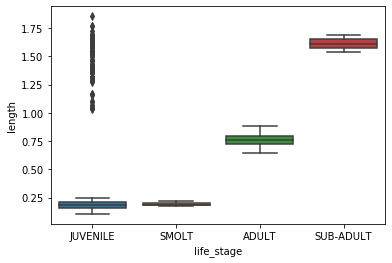

In [151]:
sns.boxplot(x='life_stage', y='length', data=animals) 

In [152]:
animals['length_type'].value_counts()

FORK              3649
CARAPACE WIDTH      30
TL                  14
Name: length_type, dtype: int64

In [153]:
animals.loc[animals['length_type'].isnull(), ['length_type']] = "FORK"

In [154]:
animals['length_type'].value_counts()

FORK              3765
CARAPACE WIDTH      30
TL                  14
Name: length_type, dtype: int64

In [156]:
len(animals[animals['length_type'].isnull()]['length_type'])

0

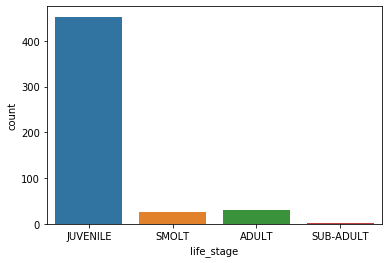

In [157]:
sns.countplot(x='life_stage', data=animals)

In [158]:
animals.loc[animals['life_stage'].isnull(), ['life_stage']] = "JUVENILE"

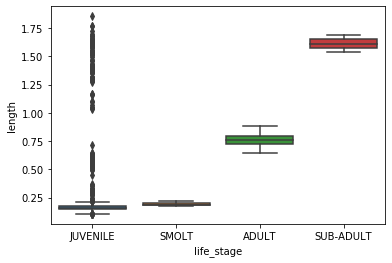

In [159]:
sns.boxplot(x='life_stage', y='length', data=animals)

In [160]:
def compute_length(cols):
    Length = cols[0]
    LifeStage = cols[1]
    
    if pd.isnull(Length):
        
        if LifeStage == "JUVENILE":
            return 0.15
        
        elif LifeStage == "SMOLT":
            return 0.25
        
        elif LifeStage == "ADULT":
            return 0.75
        
        else:
            return 1.65
    
    else:
        return Length        

In [161]:
animals['length'] = animals[['length','life_stage']].apply(compute_length, axis=1)

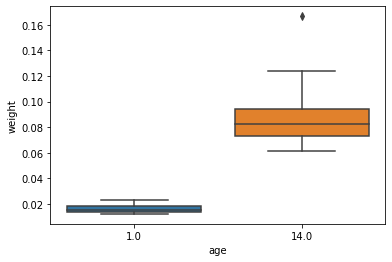

In [162]:
sns.boxplot(x='age', y='weight', data=animals)

In [163]:
def compute_weight(cols):
    Weight = cols[0]
    Age = cols[1]
    
    if pd.isnull(Weight):
        
        if Age == 1.0:
            return 0.02
        
        else:
            return 0.08
    
    else:
        return Weight        

In [164]:
animals['weight'] = animals[['weight','age']].apply(compute_length, axis=1)

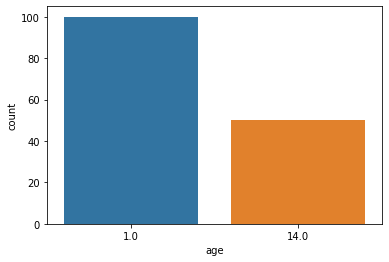

In [165]:
sns.countplot(x='age', data=animals)

In [166]:
animals.loc[animals['age'].isnull(), ['age']] = np.mean(animals['age'])

In [168]:
animals.to_csv('Animal.csv', index=False)